In [1]:
import os,sys
Nthread = 1
os.environ["OMP_NUM_THREADS"] = str(Nthread) # export OMP_NUM_THREADS=1
os.environ["OPENBLAS_NUM_THREADS"] = str(Nthread) # export OPENBLAS_NUM_THREADS=1
os.environ["MKL_NUM_THREADS"] = str(Nthread) # export MKL_NUM_THREADS=1
os.environ["VECLIB_MAXIMUM_THREADS"] = str(Nthread) # export VECLIB_MAXIMUM_THREADS=1
os.environ["NUMEXPR_NUM_THREADS"] = str(Nthread) # export NUMEXPR_NUM_THREADS=1

import matplotlib.pyplot as plt
from numpy import pi
import numpy as np

rpath = '/Users/weiliang/Documents/rcw_grad'
sys.path.append(rpath)

# change it to 1 when using autograd
import use_autograd
use_autograd.use = 0

import rcwa

In [2]:
nG = 101 # truncation order, the actual truncation order might differ from this
# lattice vector
Lx = .1
Ly = .1
L1 = [Lx,0.]
L2 = [0.,Ly]

# all patterned layers below have the same griding structure: Nx*Ny
Nx = 100
Ny = 100

# frequency and angles
freq = 1.
theta = np.pi/6
phi = np.pi*0

# now consider 4 layers: vacuum + patterned + patterned + vacuum
epsuniform0 = 1. # dielectric for layer 1 (uniform)
epsuniformN = 1.  # dielectric for layer N (uniform)

thick0 = 1. # thickness for vacuum layer 1
thickp1 = 0.1 # thickness for patterned layer 1
thickp2 = 0.1 # thickness for patterned layer 2
thickN = 1.  # thickness for vacuum layer N

# for patterned layer, eps = epsbkg + dof * epsdiff
epsbkg = 1.
epsdiff = 12.+1j*0

# setup RCWA
obj = rcwa.RCWA_obj(nG,L1,L2,freq,theta,phi)
obj.Add_LayerUniform(thick0,epsuniform0)
obj.Add_LayerGrid(thickp1,epsdiff,epsbkg,Nx,Ny)
obj.Add_LayerGrid(thickp2,epsdiff,epsbkg,Nx,Ny)
obj.Add_LayerUniform(thickN,epsuniformN)
obj.Init_Setup(Gmethod=0)

Total nG =  97


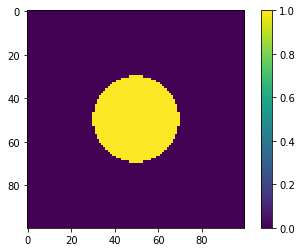

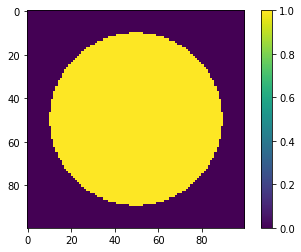

In [3]:
# Now set up epsilon of patterned layers: epsilon = epsbkg + dof * epsdiff

# set up grid-1
radius = 0.2
dof1 = np.zeros((Nx,Ny))
x0 = np.linspace(0,1.,Nx)
y0 = np.linspace(0,1.,Ny)
x, y = np.meshgrid(x0,y0,indexing='ij')
sphere = (x-.5)**2+(y-.5)**2<radius**2
dof1[sphere]=1

# set up grid-2
radius = 0.4
dof2 = np.zeros((Nx,Ny))
x0 = np.linspace(0,1.,Nx)
y0 = np.linspace(0,1.,Ny)
x, y = np.meshgrid(x0,y0,indexing='ij')
sphere = (x-.5)**2+(y-.5)**2<radius**2
dof2[sphere]=1

plt.figure();
plt.imshow(dof1)
plt.colorbar()
plt.show()

plt.figure();
plt.imshow(dof2)
plt.colorbar()
plt.show()

In [4]:
# the total dof passing to rcwa will be concatenating all dofs in layer order, so the length will be Nx*Ny*NPatternedlayer
dof = np.concatenate((dof1.flatten(),dof2.flatten()))

# Now add DOF to rcwa
obj.GridLayer_getDOF(dof.flatten())

In [5]:
p_amp = 1.
s_amp = 0.
p_phase = 0.
s_phase = 0.

obj.MakeExcitationPlanewave(p_amp,p_phase,s_amp,s_phase,order = 0, direction = 'forward')
R,T= obj.RT_Solve(normalize=1)
print("R=",R,", T=",T,", Abs=",1-R-T)

R= 0.11239038909374349 , T= 0.8876096109062558 , Abs= 7.771561172376096e-16
